<a href="https://colab.research.google.com/github/changhorang/SSAC_study/blob/main/DL/07_TODO_cifar10_CNN_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# matplotlib 한글 폰트 적용
# 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,225 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [3]:
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로딩

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
class_names = np.array(['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'])

# 이미지 확인
- matplotlib을 이용해 N개의 이미지를 확인한다. 
    - 개수는 알아서 선택하세요.

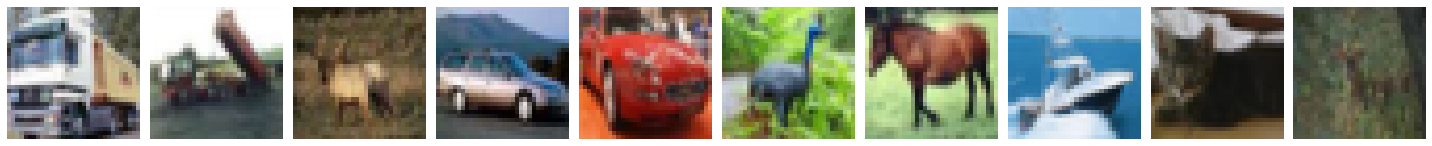

In [7]:
plt.figure(figsize=(20, 20))

for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.imshow(train_image[i])
  plt.axis('off')

plt.tight_layout()  
plt.show()

# 데이터 전처리
- X: 0 ~ 1 scaling
- y: onehot encoding

In [8]:
train_image.max(), train_image.min()

(255, 0)

In [9]:
X_train = (train_image/255.).astype(np.float32)
X_test = (test_image/255.).astype(np.float32)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

# 하이퍼파라미터, 변수 정의

In [11]:
epochs = 30
batch_size = 100
lr = 1e-3
dropout_ratio_1 = 0.5
dropout_ratio_2 = 0.3

n_train = train_image.shape[0]

# Dataset 생성
- train/test set

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(n_train).batch(batch_size, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# 모델 생성 및 컴파일
- CNN 모델을 이용해 10개의 class를 분류하는 모델을 구현

In [13]:
def create_cifar10_model():
  model = keras.Sequential()

  model.add(layers.InputLayer((32, 32, 3)))
  
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(pool_size=2, padding='same'))
  
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(pool_size=2, padding='same'))

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(pool_size=2, padding='same'))

  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(pool_size=2, padding='same'))

  model.add(layers.Flatten())
  
  model.add(layers.Dropout(rate=dropout_ratio_1))
  model.add(layers.Dense(1024))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(rate=dropout_ratio_1))
  model.add(layers.Dense(256))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(rate=dropout_ratio_2))
  model.add(layers.Dense(64))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(rate=dropout_ratio_2))
  model.add(layers.Dense(10))
  model.add(layers.BatchNormalization())
  model.add(layers.Softmax())

  return model

In [22]:
model = create_cifar10_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_7 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 64)      

# 학습 및 평가
- callback을 이용해 early stopping, 가장 성능 좋았을때 모델 저장 하세요.
    - 모델은 자신의 google drive에 저장하세요.
- 저장됬던 모델을 loading한 뒤 그 모델도 평가해보세요.

In [23]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# callback을 이용해 모델을 저장할 때 저장할 디렉토리 생성 및 경로 문자열로 저장
import os

base_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)


# base_dir = '/content/drive/MyDrive/saved_models/'
checkpoint_save_dir = os.path.join(base_dir, 'cifar10_callback')
if not os.path.isdir(checkpoint_save_dir):
    os.mkdir(checkpoint_save_dir)

checkpoint_save_file = os.path.join(checkpoint_save_dir, 'cifar10_ckpt')

In [20]:
# 저장경로: parameter만 저장할 경우 파일명까지, 모델구조+weight를 저장할 경우 directory까지 설정
mc_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_file, # save directory
                          save_best_only=True, # 성능이 개선된 경우에 계속 덮어쓰면서 저장
                          monitor='val_loss',  # 어떤 성능 개선일 때 저장할 지 모니터링할 평가지표
                          # save_weights_only=True, # parameter(weight)만 저장 [default: False]
                          verbose=1) # 저장할 때 로그 출력

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', # 모니터링할 평가지표
                                            patience=8, # 지정한 epoch만 지나도록 개선이 안되면 train stop (general 5~10)
                                            verbose=1)  # log 출력 (멈춘 이유 description)

ls_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', # 성능개선과 관련해 볼 평가지표
                          factor=0.5, # lr 조정 비율 (현재 lr*factor)
                          patience=3, # 성능 개선이 안될 때, 몇 epoch까지 기다릴 지 지정 (general=10~)
                          mode='min', # monitor의 값이 어떨 때 성능 개선 되는지 (min=작을 수록, max=클수록, auto=자동으로)
                          verbose=2) # 학습률 변화시 로그 남기기

In [24]:
hist = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset,
                  callbacks=[mc_callback, ls_callback])

Epoch 1/30
499/500 [============================>.] - ETA: 0s - loss: 1.6163 - accuracy: 0.4261
Epoch 00001: val_loss did not improve from 1.21304
500/500 [==============================] - 21s 38ms/step - loss: 1.6157 - accuracy: 0.4264 - val_loss: 1.5023 - val_accuracy: 0.4645 - lr: 0.0010
Epoch 2/30
499/500 [============================>.] - ETA: 0s - loss: 1.1790 - accuracy: 0.6072
Epoch 00002: val_loss improved from 1.21304 to 1.19203, saving model to /content/saved_models/cifar10_callback/cifar10_ckpt
INFO:tensorflow:Assets written to: /content/saved_models/cifar10_callback/cifar10_ckpt/assets
500/500 [==============================] - 23s 46ms/step - loss: 1.1787 - accuracy: 0.6074 - val_loss: 1.1920 - val_accuracy: 0.5985 - lr: 0.0010
Epoch 3/30
499/500 [============================>.] - ETA: 0s - loss: 0.9830 - accuracy: 0.6801
Epoch 00003: val_loss improved from 1.19203 to 0.99343, saving model to /content/saved_models/cifar10_callback/cifar10_ckpt
INFO:tensorflow:Assets writ

In [25]:
# loss 그래프
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# accuracy 그래프
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


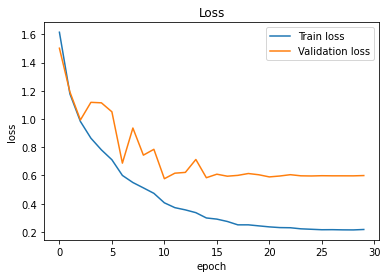

In [26]:
plot_loss(hist)

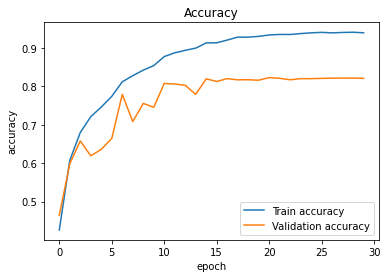

In [27]:
plot_accuracy(hist)